# Álgebra Lineal

## Vectores
### Definición
Un vector es una cantidad definida por una magnitud y una dirección. Por ejemplo, la velocidad de un cohete es un vector tridimensional: su magnitud es la velocidad del cohete y su dirección es (con suerte) hacia arriba. Un vector se puede representar mediante una matriz de números llamados *escalares*. Cada escalar corresponde a la magnitud del vector con respecto a cada dimensión.

Por ejemplo, digamos que el cohete sube con un ligero ángulo: tiene una velocidad vertical de 5.000 m/s, y también una ligera velocidad hacia el Este de 10 m/s, y una ligera velocidad hacia el Norte de 50 m/s. s. La velocidad del cohete se puede representar mediante el siguiente vector:

**velocidad** $= \begin{pmatrix}
10 \\
50 \\
5000 \\
\end{pmatrix}$

Nota: por convención, los vectores generalmente se presentan en forma de columnas. Además, los nombres de los vectores suelen estar en minúsculas para distinguirlos de las matrices (que analizaremos a continuación) y en negrita (cuando sea posible) para distinguirlos de valores escalares simples como ${metros\_per\_segundo} = 5026$.

Una lista de $n$ números también puede representar las coordenadas de un punto en un espacio $n$-dimensional, por lo que es bastante frecuente representar vectores como puntos:
$$u=(u_{1},\dots, u_{n})\in \mathbb{R}^{n}.$$


###  Propósito
Los vectores tienen muchos propósitos en el aprendizaje automático, sobre todo representar observaciones y predicciones. Por ejemplo, digamos que creamos un sistema de aprendizaje automático para clasificar videos en 3 categorías (buenos, spam, clickbait) según lo que sabemos sobre ellos. Para cada vídeo, tendríamos un vector que representa lo que sabemos sobre él, como por ejemplo:

**video** $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$



$\color{red}{Ejercicio:}$ Investiga $5$ aplicaciones de los usos de los vectores en Economía.

## Vectores en python

Un vector puede representarse a través de una `lista`.

In [ ]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Un **vector** es una matriz de tamaño $n\times 1$ o $1\times n$. Tomaremos como antes, un vector como matriz de tamaño $1\times n$:
$$u=(u_{1},\dots, u_{n})\in \mathbb{R}^{n}.$$
Si $u$ y $v=(v_{1},\dots, v_{n})$ son dos vectores en $\mathbb{R}^{n}$ (es decir, son matrices del mismo tamaño) entonces la suma de $u$ con $v$ es:
$$u+v=(u_{1}+v_{1},\dots, u_{n}+v_{n})$$

También, si $\lambda \in \mathbb{R}$
$$\lambda u = (\lambda u_{1}, \dots, \lambda u_{n})\in \mathbb{R}^n.$$

Quisieramos usar la operación `+` en Python para sumar vectores. Sin embargo, si tomamos listas ocurre lo siguiente:

In [ ]:
[10.5, 5.2, 3.25, 7.0] + [11.2, 3.6, 6.22, 8.1]

[10.5, 5.2, 3.25, 7.0, 11.2, 3.6, 6.22, 8.1]

Vamos a usar NumPy's `ndarray`, que proporciona muchas implementaciones convenientes y optimizadas de operaciones matemáticas esenciales en vectores(NumPy, Tutorial [NumPy tutorial](tools_numpy.ipynb)).

In [ ]:
import numpy as np

video_1 = np.array([10.5, 5.2, 3.25, 7.0])
video_1

array([10.5 ,  5.2 ,  3.25,  7.  ])

Si declaramos otro vector

In [ ]:
video_2 = np.array([11.2, 3.6, 6.22, 8.1])
video_2

array([11.2 ,  3.6 ,  6.22,  8.1 ])

Entonces,

In [ ]:
video_1 + video_2

array([21.7 ,  8.8 ,  9.47, 15.1 ])

El tamaño de un vector se puede obtener usando el atributo `size`:

In [ ]:
video_1.size

4

El $i$-ésimo elemento (también llamado *entrada* o *componente*) of a vector $\textbf{v}$ se denota por $\textbf{v}_i$.

**Tenga en cuenta que los índices en matemáticas generalmente comienzan en 1, pero en programación generalmente comienzan en 0.**

In [ ]:
video_1[2]  # tercer elemento

3.25

## Graficas de vectores
Para graficar vectores usaremos matplotlib,(matplotlib, documentación [matplotlib tutorial](tools_matplotlib.ipynb)):

In [ ]:
import matplotlib.pyplot as plt

### Vectores en 2D
Creamos un par de vectores 2D muy simples para graficar:

In [ ]:
u = np.array([2, 5])
v = np.array([3, 1])

Cada uno de estos vectores tiene 2 elementos, por lo que se pueden representar fácilmente gráficamente en un gráfico 2D, por ejemplo como puntos:

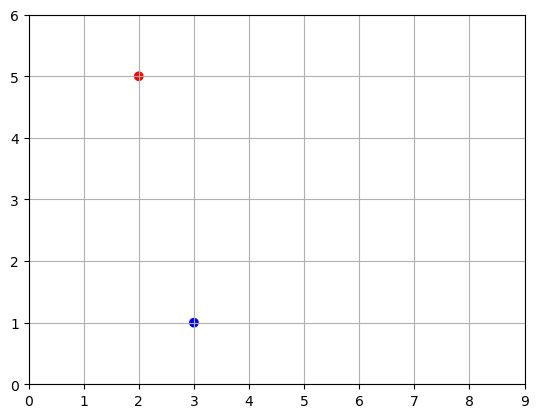

In [ ]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Los vectores también se pueden representar como flechas. Creemos una pequeña función de conveniencia para dibujar puntos y su flecha respectiva:

In [ ]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

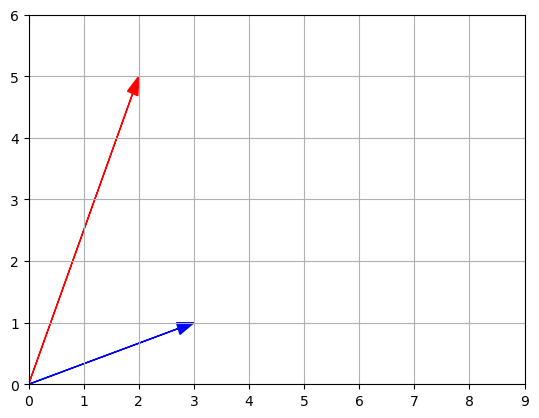

In [ ]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### 3D vectores
Graficar vectores en 3D también es relativamente sencillo. Primero, creamos dos vectores en 3D:

In [ ]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

Usamos `Axes3D`:

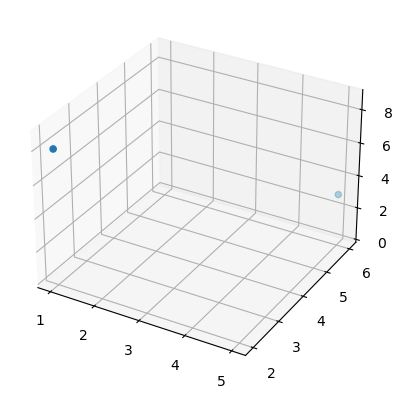

In [ ]:
subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

Es un poco difícil visualizar exactamente en qué parte del espacio están estos dos puntos, así que agreguemos líneas verticales. Crearemos una pequeña función de conveniencia para graficar una lista de vectores 3D con líneas verticales adjuntas:

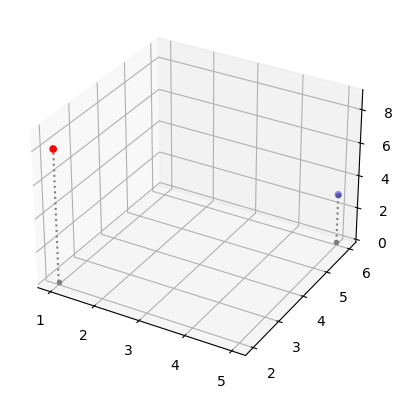

In [ ]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Norma de un vector

La norma de un vector $u$, denotado por $|u |$, es una medida de la longitud o **magnitud** de $u$. La **norma euclideana** se define por:

$$|u| = \sqrt{\sum_{i}{u_i}^2}$$


In [ ]:
def norma(vector):
    cuad = [e**2 for e in vector]
    return sum(cuad)**0.5

print("||", u, "|| =")
norma(u)

|| [2 5] || =


5.385164807134504

Tracemos un pequeño diagrama para confirmar que la magnitud del vector $\textbf{u}$ is $\approx5.4$:

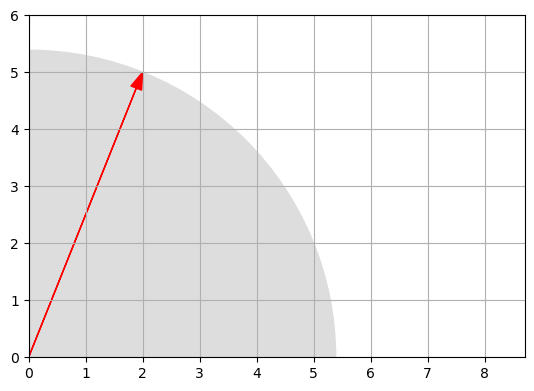

In [ ]:
radio = np.linalg.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radio, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

## Suma de vectores

Si $u=(u_{1},\dots, u_{n})\in \mathbb{R}^n$ y $v=(v_{1},\dots, v_{n})\in \mathbb{R}^n$ son vectores en $\mathbb{R}^n$, definimos la suma de $u$ con $v$ como:
$$u+v=(u_{1}+v_{1},\dots, u_{n}+v_{n})\in \mathbb{R}^n.$$

In [ ]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Veamos cómo se visualiza la suma de vectores en $\mathbb{R}^2$:

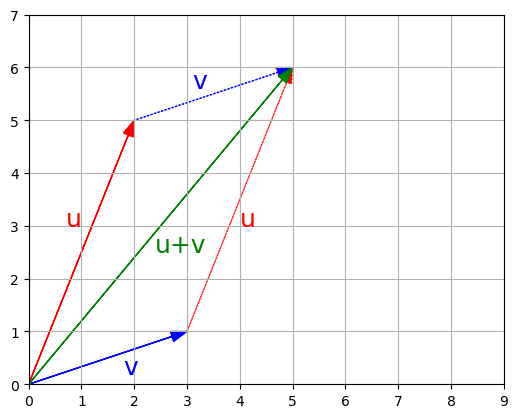

In [ ]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.gca().set_aspect("equal")
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

Sean $u,v,w$ vectores en $\mathbb{R}^n$.

La suma de vectores es **conmutativa**, esto significa que $u + v = v + u$. ¿Puedes verlo es la figura anterior?

La suma de vectores es **asociativa**, esto significa que $u + (v + w) = (u + v) + w$.

## Multiplicación por un escalar
Sea $u$ un vector en $\mathbb{R}^n$ y $\lambda \in \mathbb{R}$. Definimos la multiplicación del escalar $\lambda$ por $u$ como:
$$\lambda u = (\lambda u_{1},\dots, \lambda u_{n})\in \mathbb{R}^{n}$$

In [ ]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

Gráficamente, la multiplicación escalar da como resultado cambiar la escala de una figura, de ahí el nombre *escalar*. La distancia desde el origen (el punto en coordenadas iguales a cero) también se multiplica por el escalar. Por ejemplo, aumentemos la escala en un factor de $\lambda = 2.5$:

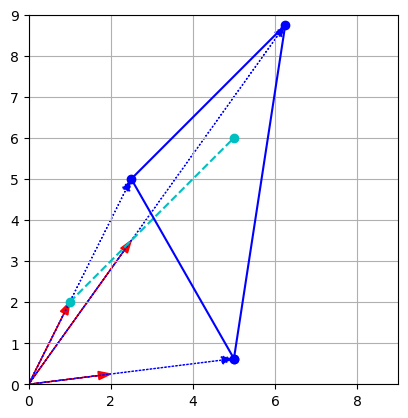

In [ ]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

La multiplicación por escalar **conmutativa**: $\lambda u = u \lambda$.

La multiplicación por escalar **asociativa**: $\lambda_1 (\lambda_2  u) = (\lambda_1  \lambda_2)u$.

Finalmente, es **distributiva** sobre la suma de vectores: $\lambda (u + v) = \lambda u + \lambda  v$.

## Vectores cero, unitario y normalizaciones
* Un **vector cero** 3s el vector $0=(0,\dots, 0)\in \mathbb{R}^n$.
* Un **vector unitario** es aquel que tiene norma igual a $1$.
* El **vector normalizado** de un vector $v$ que no es vector cero, noted $\hat{v}$, es el vector unitario que apunta en la misma dirección que $v$. Es igual a: $\hat{v} = \dfrac{v}{\left \Vert v \right \|}$



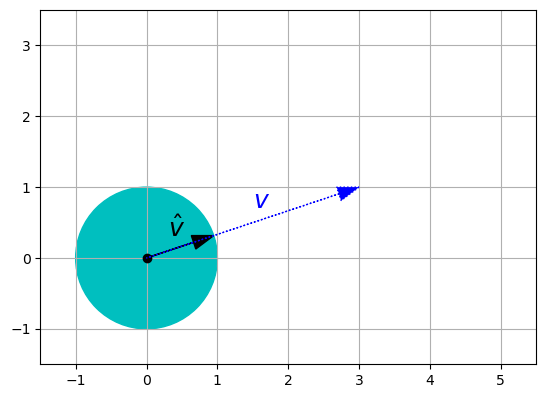

In [ ]:
plt.gca().add_artist(plt.Circle((0, 0), 1, color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / np.linalg.norm(v), color="k", zorder=10)
plot_vector2d(v, color="b", linestyle=":", zorder=15)
plt.text(0.3, 0.3, r"$\hat{v}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$v$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

## Producto punto

Usamos el método`np.dot()`:

In [ ]:
np.dot(u, v)

11

El producto punto cumple la siguiente propiedad:
    Si $u$ y $v$ son dos vectores en $\mathbb{R}^n$, entonces
    $$u \cdot v = |u| \ |v| \ \cos(\theta),$$
  donde $\theta$ es el ángulo que se forma entre $u$ y $v$

### Calculando el ángulo entre dos vectores
Uno de los muchos usos del producto escalar es calcular el ángulo entre dos vectores distintos de cero. Observando la definición del producto escalar, podemos deducir la siguiente fórmula:

$\theta = \arccos{\left ( \dfrac{u \cdot v}{\left \Vert u \right \| \times \left \Vert v \right \|} \right ) }$

Note que si $u \cdot v = 0$, entonces $\theta = \dfrac{π}{2}$. En otras palabras, si el producto escalar de dos vectores no nulos es cero, significa que son ortogonales.


In [ ]:
def vector_angulo(u, v):
    cos_theta = u.dot(v) / np.linalg.norm(u) / np.linalg.norm(v)
    return np.arccos(cos_theta.clip(-1, 1))

theta = vector_angulo(u, v)
print("Angulo =", theta, "radianes")
print("      =", theta * 180 / np.pi, "grados")

Angulo = 0.8685393952858895 radianes
      = 49.76364169072618 grados


Nota: debido a pequeños errores de punto flotante, `cos_theta` puede estar ligeramente fuera del intervalo $[-1, 1]$, lo que haría que `arccos` fallara. Es por eso que recortamos el valor dentro del rango, usando la función `clip` de NumPy.

### Projectando un punto sobre un eje
El producto escalar también es muy útil para proyectar puntos sobre un eje. La proyección del vector $v$ sobre el eje $u$ está dado por la fórmula:

$$\textbf{proj}_{u}{v} = \dfrac{u \cdot v}{\left \Vert u \right \| ^2} \times u.$$

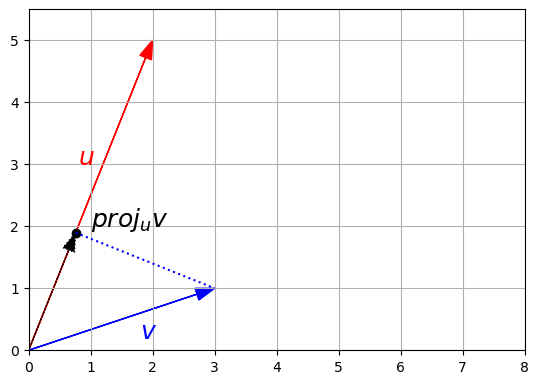

In [ ]:
u_normalized = u / np.linalg.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()